In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [2]:
# Random measurments load results

result = {}
for n in [8, 16, 32, 64, 128, 256, 512]:
    n = 3*n //2
    result[n] = {}
    for degree in [2, 3, 4, 5]:
        result[n][degree] = {}
        my_range = np.linspace(0.4 *degree*np.log2(n), 6 * degree*np.log2(n), 50)
        m_list = [int(a) for a in my_range]
        for m in m_list:
            result[n][degree][m] = []
            for try_no in range(20):
                try:
                    f =open(f"results/n={n}_m={m}_d={degree}_{try_no}.json")
                    data = json.loads(f.read())
                    result[n][degree][m].append(data)
                except:
                    print(f"Couldn't find results/n={n}_m={m}_d={degree}_{try_no}.json")
                    print(f"Assume job failed")
                    data = {'status': False, 'time':60*60*4, 'n': n, 'm': m, 'd': degree}
                    result[n][degree][m].append(data)
                        

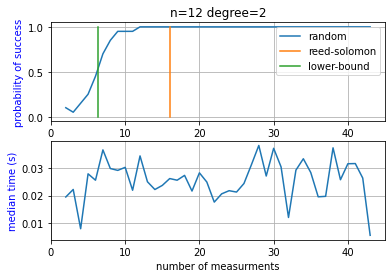

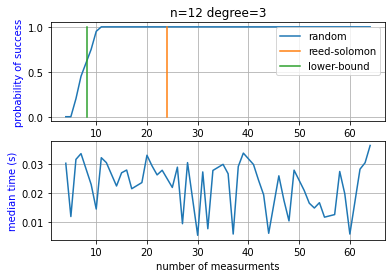

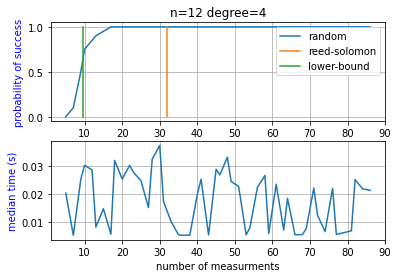

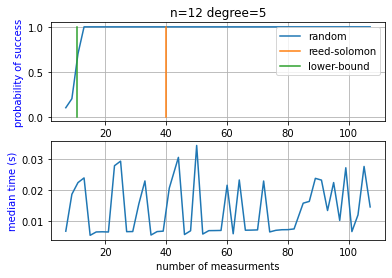

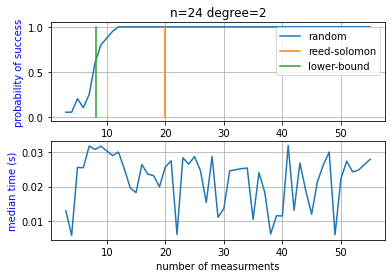

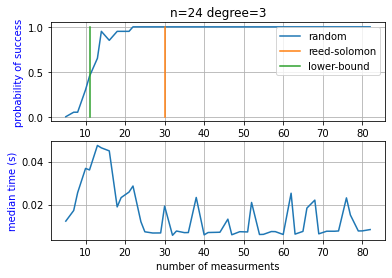

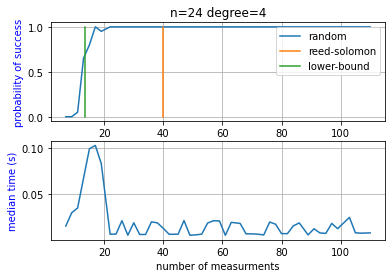

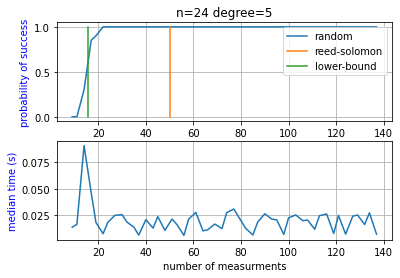

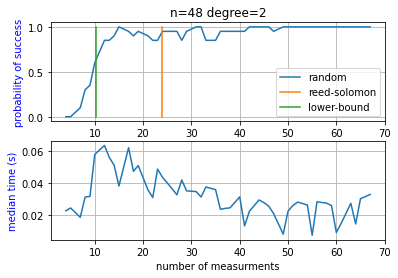

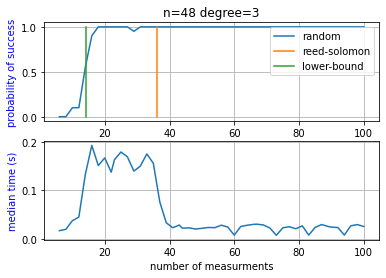

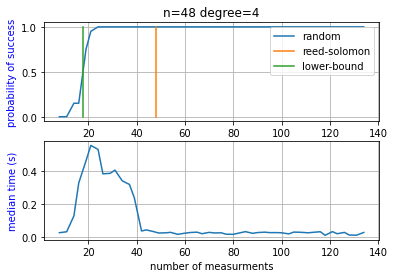

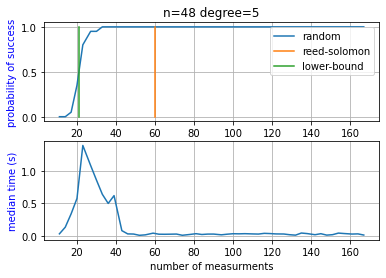

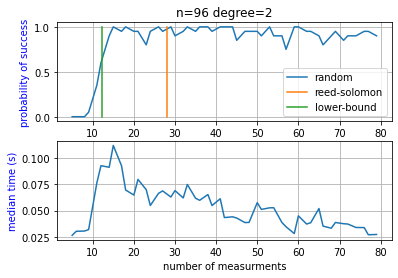

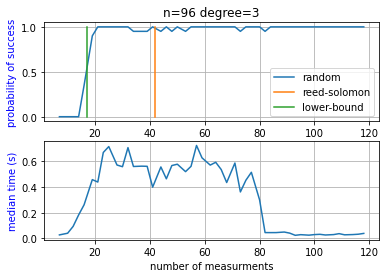

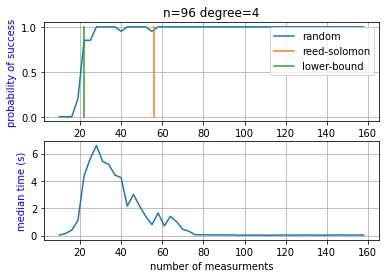

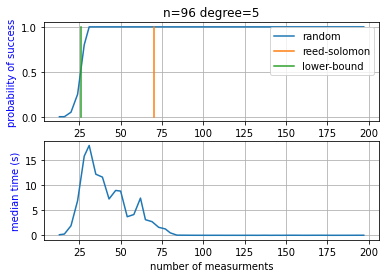

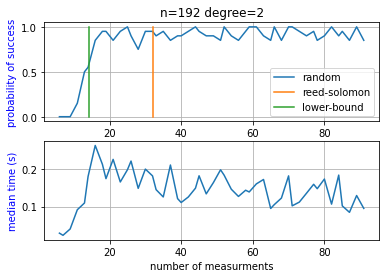

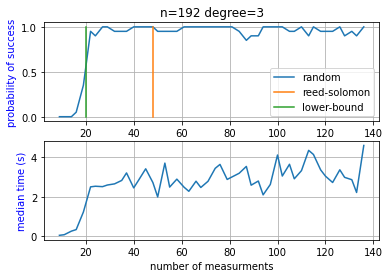

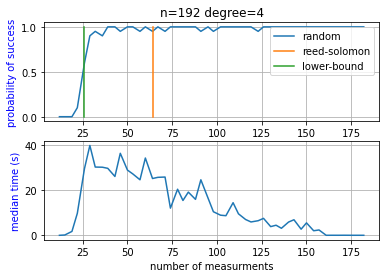

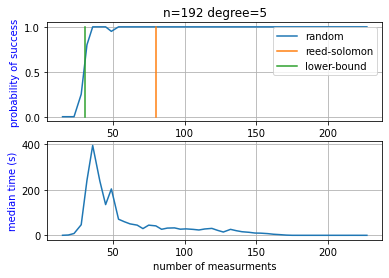

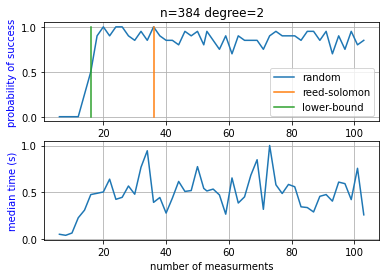

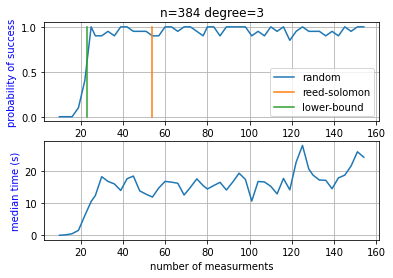

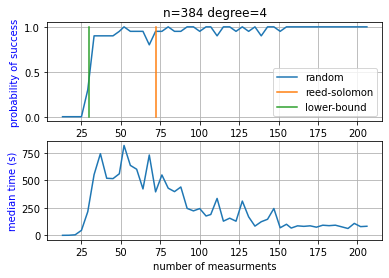

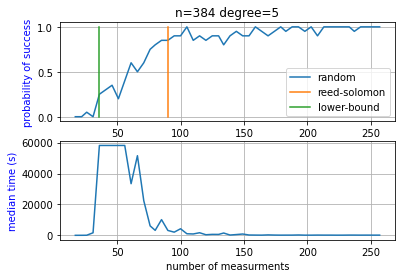

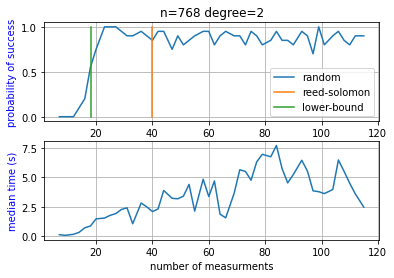

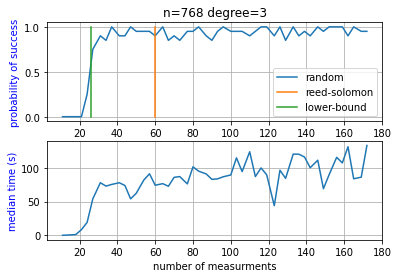

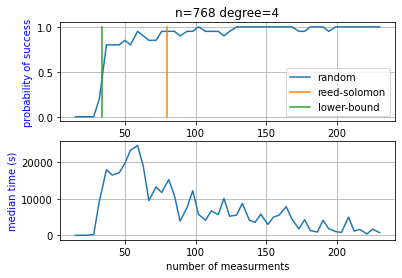

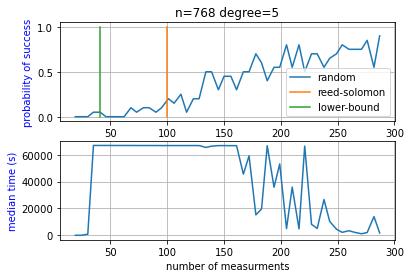

In [5]:
# Random measurements plot results
for n in result:
    for degree in result[n]:
        no_measurements , p_failure, time  = [], [], []
        for m in result[n][degree]:
            p = sum([1 for j in range(20) if result[n][degree][m][j]["status"]==True])/20
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result[n][degree][m][j]["time"] for j in range(20)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_failure, label="random")
        ax1.plot( [2*degree*math.ceil(np.log2(n))]*my_len, np.linspace(0,1,my_len), label="reed-solomon")
        ax1.plot( [lower_bound(n, degree)]*my_len, np.linspace(0,1,my_len), label = "lower-bound")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        ax1.legend()
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time)
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        plt.savefig(f"images/random/n={n}_d={degree}", dpi=300)
        plt.show()
        
           

In [11]:
# Binning and reed-solomon load the results
from math import ceil 
result_binning = {}
result_reedsolomon = {}
for n in [16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    n = 3*n // 2
    result_binning[n] = {}
    for degree in [2, 3, 4, 5]:
        result_binning[n][degree] = {}
        no_bins_range = np.linspace(0.1 * degree**2,  degree**2, 10)
        no_bins_range = [ceil(a) for a in no_bins_range]
        for no_bins in no_bins_range:
            for no_iterations in [1,2,3,4,5]:
                for ratio in [1.2,1.3,1.4,1.5,1.6]:
                    for try_no in range(10):
                        with open(f"results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json") as f:
                            try:
                                data = json.loads(f.read())
                                m = data["measurements"]
                                try:
                                    result_binning[n][degree][m].append(data)
                                except:
                                    result_binning[n][degree][m] = [data]
                            except:
                                print(f"couldn't find results2/n={n}_nobins={no_bins}_no_iter={no_iterations}_ratio={ratio}_d={degree}_{try_no}.json")
       
            
for n in [16, 32, 64, 128, 256, 512, 1024]:
    n = 3*n//2
    result_reedsolomon[n] = {}
    for degree in [2, 3, 4, 5]:
        with open(f"results3/n={n}_d={degree}.json") as f:
            data = json.loads(f.read())
            result_reedsolomon[n][degree] = {"measurements": data["measurements"], "times":data["times"]}

30 1.0 47
42 1.0 48
28 1.0 26
13 1.0 41
18 1.0 51
55 1.0 53
14 1.0 44
15 1.0 65
18 1.0 66
14 1.0 64
20 1.0 62
11 1.0 68
21 1.0 61
12 1.0 60
27 1.0 59
21 1.0 58
9 1.0 56
9 1.0 55
18 1.0 75
12 1.0 78
12 1.0 76
15 1.0 57


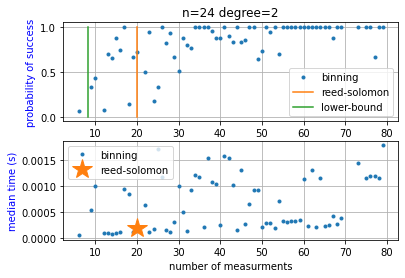

8 1.0 44
31 1.0 64
29 1.0 69
12 1.0 63
17 1.0 62
35 1.0 59
21 1.0 74
38 1.0 76
12 1.0 73
28 1.0 67
35 1.0 57
15 1.0 70
14 1.0 86
12 1.0 84
11 1.0 85
9 1.0 88
8 1.0 83
11 1.0 89
9 1.0 82
21 1.0 79
13 1.0 71
15 1.0 72
11 1.0 90
10 1.0 87
11 1.0 93
9 1.0 92


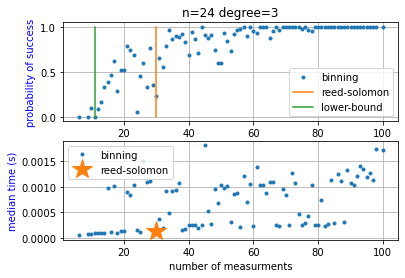

22 1.0 59
27 1.0 77
35 1.0 75
19 1.0 79
14 1.0 69
10 1.0 52
12 1.0 71
27 1.0 82
23 1.0 88
29 1.0 85
25 1.0 87
20 1.0 83
20 1.0 81
18 1.0 80
13 1.0 51
18 1.0 74
16 1.0 93
17 1.0 91
18 1.0 90
20 1.0 89
8 1.0 92
28 1.0 84
8 1.0 96
11 1.0 95
15 1.0 98
9 1.0 94
14 1.0 104
19 1.0 97
11 1.0 99
10 1.0 101
13 1.0 103
10 1.0 102
11 1.0 106
9 1.0 108
8 1.0 107
9 1.0 109


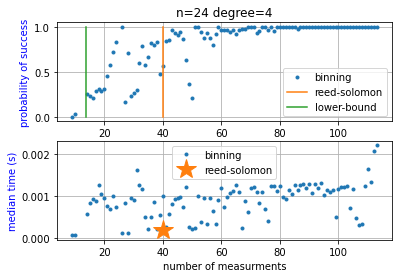

56 1.0 69
34 1.0 71
16 1.0 72
15 1.0 60
14 1.0 59
33 1.0 89
33 1.0 87
35 1.0 88
19 1.0 84
18 1.0 85
33 1.0 86
13 1.0 79
15 1.0 78
20 1.0 82
12 1.0 74
10 1.0 73
21 1.0 94
11 1.0 95
22 1.0 92
28 1.0 93
37 1.0 91
38 1.0 90
23 1.0 83
13 1.0 96
14 1.0 101
15 1.0 99
16 1.0 104
9 1.0 102
16 1.0 98
8 1.0 100
17 1.0 109
17 1.0 106
23 1.0 110
12 1.0 103
17 1.0 108
16 1.0 105
15 1.0 111
13 1.0 107
16 1.0 113
10 1.0 114
15 1.0 112
8 1.0 117


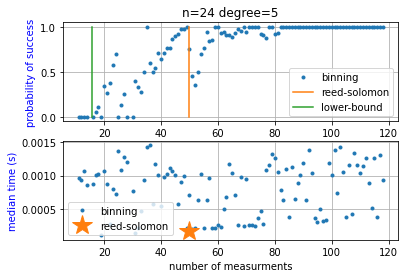

8 1.0 29
12 1.0 50
10 1.0 83
9 1.0 38
21 1.0 37
9 1.0 58
15 1.0 61
9 1.0 54
36 1.0 79
9 1.0 78
9 1.0 69
9 1.0 99
9 1.0 100
9 1.0 86
12 1.0 84
33 1.0 72
12 1.0 73


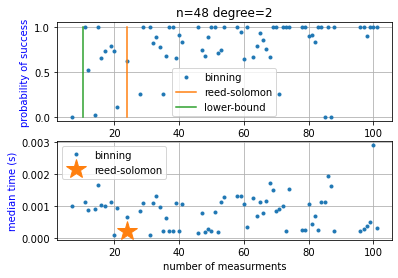

8 1.0 66
25 1.0 79
18 1.0 84
16 1.0 77
22 1.0 100
13 1.0 97
34 1.0 86
17 1.0 87
16 1.0 95
13 1.0 90
17 1.0 92
13 1.0 94
18 1.0 76
13 1.0 117
8 1.0 114
20 1.0 116
13 1.0 103
22 1.0 105
25 1.0 104
9 1.0 102
19 1.0 91
11 1.0 120
10 1.0 110
19 1.0 106
9 1.0 56
17 1.0 107
9 1.0 130
8 1.0 142


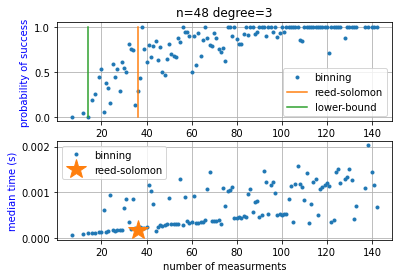

14 1.0 97
18 1.0 101
29 1.0 74
8 1.0 93
24 1.0 76
9 1.0 113
17 1.0 116
9 1.0 119
12 1.0 117
9 1.0 120
12 1.0 122
13 1.0 124
18 1.0 125
11 1.0 121
11 1.0 118
18 1.0 115
18 1.0 106
11 1.0 108
17 1.0 110
10 1.0 109
21 1.0 107
11 1.0 134
23 1.0 129
11 1.0 131
13 1.0 130
15 1.0 127
15 1.0 126
16 1.0 128
10 1.0 112
15 1.0 111
9 1.0 148
11 1.0 152
8 1.0 151
8 1.0 150
10 1.0 154
13 1.0 142
12 1.0 143
8 1.0 140
9 1.0 147
15 1.0 141
12 1.0 133


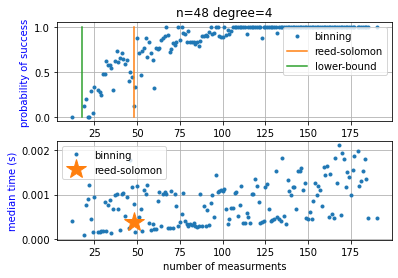

9 1.0 61
11 1.0 93
13 1.0 115
9 1.0 114
12 1.0 102
18 1.0 88
13 1.0 109
13 1.0 110
16 1.0 104
17 1.0 108
13 1.0 112
9 1.0 111
10 1.0 98
15 1.0 130
15 1.0 128
10 1.0 134
13 1.0 133
10 1.0 129
16 1.0 131
14 1.0 126
17 1.0 125
25 1.0 127
11 1.0 113
19 1.0 123
20 1.0 119
16 1.0 121
16 1.0 154
14 1.0 147
15 1.0 153
16 1.0 149
11 1.0 152
16 1.0 144
13 1.0 143
11 1.0 145
12 1.0 141
21 1.0 132
16 1.0 124
15 1.0 170
9 1.0 173
13 1.0 172
11 1.0 163
14 1.0 156
10 1.0 158
19 1.0 155
12 1.0 157
12 1.0 150
8 1.0 151
18 1.0 148
13 1.0 169
10 1.0 146
10 1.0 160
8 1.0 168


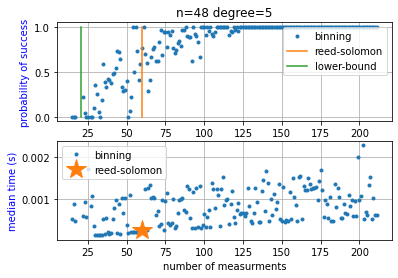

10 1.0 59
24 1.0 78
20 1.0 77
36 1.0 97
18 1.0 95
18 1.0 23
15 1.0 25
15 1.0 82
9 1.0 83
12 1.0 121
15 1.0 101
15 1.0 102
24 1.0 86


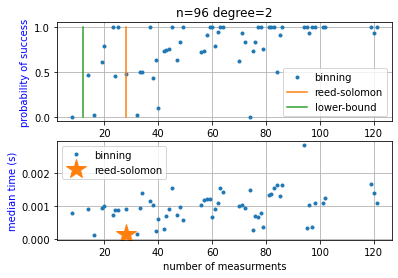

23 1.0 120
9 1.0 117
41 1.0 119
12 1.0 121
11 1.0 84
8 1.0 92
8 1.0 143
8 1.0 142
17 1.0 125
17 1.0 124
11 1.0 150
9 1.0 145
12 1.0 134
15 1.0 131
11 1.0 126
9 1.0 122
12 1.0 152
10 1.0 130
8 1.0 80
12 1.0 151


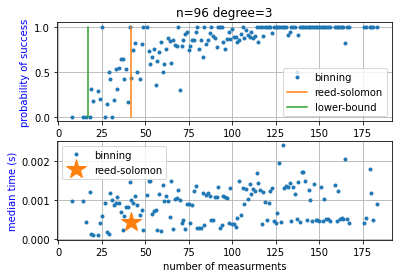

21 1.0 121
10 1.0 117
10 1.0 116
13 1.0 144
17 1.0 143
15 1.0 142
19 1.0 125
17 1.0 111
13 1.0 127
8 1.0 122
13 1.0 123
18 1.0 154
12 1.0 128
15 1.0 136
10 1.0 139
8 1.0 135
9 1.0 166
9 1.0 165
8 1.0 160
11 1.0 161
9 1.0 130
9 1.0 131
11 1.0 153
12 1.0 156
12 1.0 149
8 1.0 148
8 1.0 197
13 1.0 194
16 1.0 193
11 1.0 198
13 1.0 182
11 1.0 173
12 1.0 171
16 1.0 170
11 1.0 169
12 1.0 172
12 1.0 141
11 1.0 174
11 1.0 175
9 1.0 206
11 1.0 208
9 1.0 207


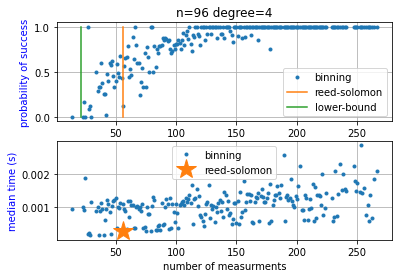

10 1.0 114
10 1.0 145
19 1.0 139
12 1.0 135
8 1.0 118
10 1.0 111
9 1.0 165
12 1.0 168
11 1.0 166
13 1.0 169
8 1.0 160
8 1.0 144
14 1.0 130
17 1.0 131
16 1.0 129
12 1.0 153
15 1.0 154
13 1.0 133
10 1.0 132
8 1.0 197
12 1.0 195
10 1.0 194
12 1.0 182
8 1.0 183
15 1.0 184
16 1.0 171
13 1.0 174
11 1.0 173
12 1.0 157
8 1.0 151
9 1.0 191
10 1.0 193
9 1.0 190
9 1.0 188
8 1.0 232
9 1.0 233
14 1.0 210
15 1.0 208
9 1.0 206
11 1.0 212
12 1.0 204
9 1.0 203
9 1.0 213
15 1.0 196
9 1.0 180
10 1.0 179
9 1.0 236
8 1.0 211
8 1.0 207
11 1.0 122
9 1.0 216
9 1.0 244
10 1.0 239
8 1.0 238
8 1.0 245
8 1.0 263


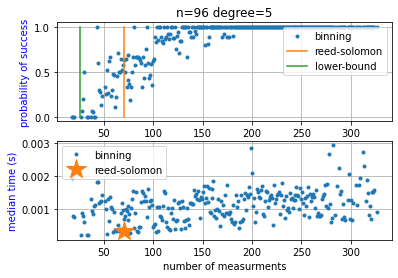

8 1.0 46
8 1.0 88
9 1.0 57
18 1.0 83
15 1.0 94
12 1.0 95
9 1.0 141
21 1.0 99
33 1.0 98


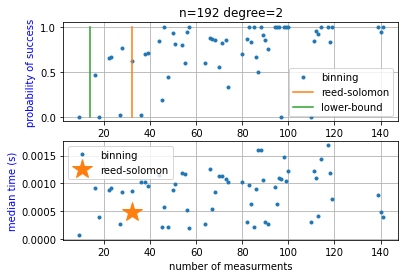

8 1.0 69
13 1.0 95
15 1.0 96
8 1.0 103
12 1.0 172
12 1.0 147
27 1.0 129
23 1.0 130
26 1.0 144
10 1.0 127
22 1.0 158
8 1.0 145
10 1.0 150
21 1.0 143
13 1.0 182
10 1.0 169
10 1.0 132
8 1.0 133
12 1.0 198
10 1.0 180
8 1.0 181
16 1.0 159


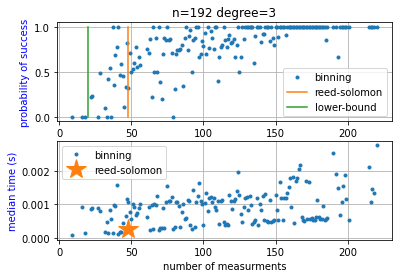

8 1.0 170
12 1.0 171
13 1.0 147
20 1.0 149
12 1.0 145
10 1.0 183
14 1.0 186
11 1.0 188
9 1.0 174
17 1.0 144
9 1.0 132
8 1.0 123
15 1.0 163
12 1.0 162
10 1.0 136
13 1.0 196
9 1.0 200
15 1.0 175
9 1.0 161
15 1.0 189
13 1.0 187
11 1.0 177
16 1.0 176
10 1.0 178
8 1.0 180
13 1.0 160
11 1.0 240
11 1.0 241
9 1.0 238
10 1.0 225
11 1.0 212
13 1.0 213
9 1.0 215
8 1.0 197
8 1.0 255
11 1.0 210
8 1.0 209


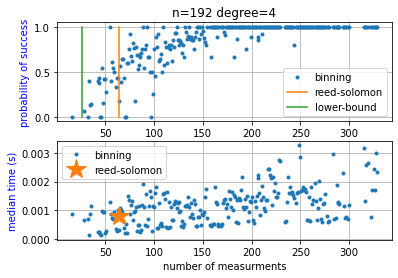

9 1.0 139
13 1.0 172
8 1.0 171
13 1.0 173
12 1.0 161
10 1.0 199
10 1.0 197
10 1.0 190
13 1.0 175
13 1.0 200
16 1.0 188
15 1.0 185
9 1.0 176
8 1.0 182
10 1.0 239
11 1.0 241
14 1.0 238
8 1.0 205
10 1.0 184
9 1.0 240
11 1.0 213
10 1.0 212
9 1.0 288
10 1.0 287
8 1.0 289
11 1.0 259
10 1.0 260
10 1.0 252
8 1.0 246
9 1.0 247
11 1.0 210
14 1.0 263
10 1.0 258
8 1.0 318
9 1.0 316
8 1.0 317
12 1.0 319
8 1.0 278
8 1.0 300
9 1.0 253
9 1.0 276


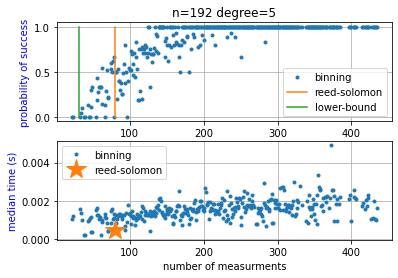

60 1.0 64
60 1.0 160


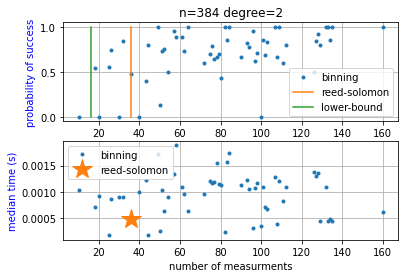

12 1.0 135
8 1.0 157
13 1.0 198
12 1.0 150
11 1.0 148
18 1.0 140
31 1.0 183
15 1.0 182
8 1.0 137
12 1.0 173
14 1.0 213
8 1.0 214
8 1.0 196
14 1.0 197
8 1.0 171
24 1.0 107
12 1.0 153
8 1.0 229
12 1.0 210


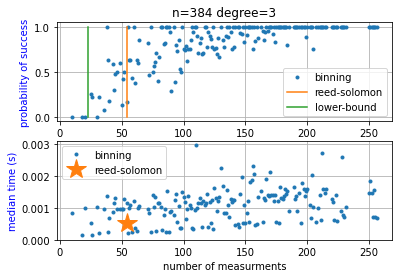

8 1.0 116
14 1.0 198
24 1.0 173
8 1.0 176
11 1.0 175
15 1.0 164
16 1.0 215
17 1.0 189
10 1.0 191
10 1.0 230
15 1.0 220
13 1.0 221
9 1.0 222
14 1.0 237
15 1.0 207
10 1.0 209
13 1.0 206
8 1.0 280
10 1.0 284
9 1.0 259
11 1.0 144
12 1.0 252
8 1.0 288
8 1.0 246
11 1.0 301
10 1.0 245
12 1.0 247
10 1.0 248
8 1.0 249


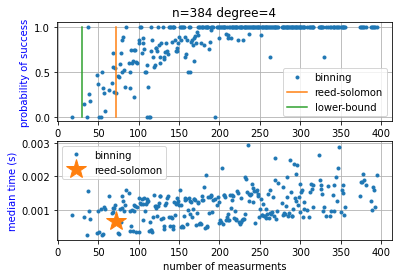

11 1.0 157
8 1.0 160
9 1.0 199
11 1.0 197
17 1.0 190
8 1.0 172
8 1.0 230
17 1.0 222
11 1.0 223
10 1.0 187
8 1.0 237
12 1.0 238
11 1.0 220
15 1.0 207
12 1.0 209
11 1.0 282
13 1.0 280
8 1.0 257
9 1.0 240
9 1.0 253
10 1.0 250
11 1.0 344
8 1.0 341
8 1.0 290
10 1.0 312
13 1.0 377
8 1.0 376
13 1.0 281
9 1.0 279
9 1.0 358
10 1.0 308
8 1.0 390


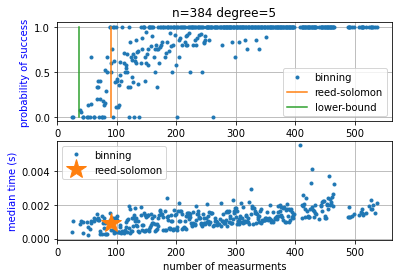

12 1.0 58
10 1.0 69
22 1.0 114
8 1.0 112
16 1.0 142
64 1.0 144
18 1.0 93
9 1.0 94
15 1.0 121
18 1.0 105
60 1.0 180
12 1.0 151
15 1.0 124


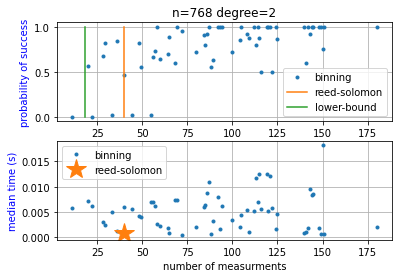

8 1.0 140
9 1.0 121
17 1.0 152
8 1.0 151
9 1.0 179
12 1.0 178
23 1.0 225
20 1.0 224
14 1.0 166
8 1.0 167
11 1.0 185
23 1.0 186
26 1.0 187
13 1.0 243
12 1.0 194
12 1.0 193
9 1.0 171
8 1.0 172
23 1.0 173
28 1.0 159
13 1.0 216
17 1.0 261
11 1.0 260
14 1.0 192
18 1.0 209
14 1.0 208
8 1.0 288
12 1.0 237
12 1.0 207
12 1.0 206


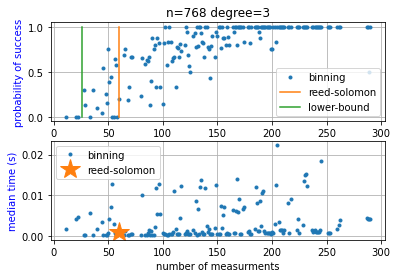

14 1.0 179
13 1.0 197
14 1.0 195
16 1.0 185
15 1.0 262
13 1.0 261
10 1.0 252
8 1.0 251
9 1.0 198
11 1.0 192
8 1.0 143
8 1.0 272
9 1.0 239
11 1.0 322
8 1.0 294
8 1.0 293
10 1.0 274
9 1.0 246
8 1.0 204
8 1.0 205
8 1.0 305
16 1.0 286
8 1.0 291
9 1.0 236
11 1.0 338
12 1.0 285
8 1.0 347
8 1.0 281
11 1.0 350


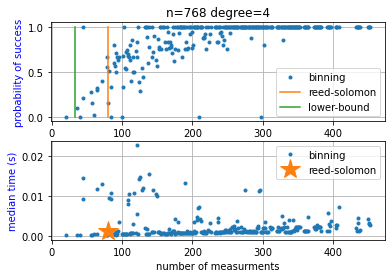

8 1.0 195
14 1.0 253
9 1.0 240
9 1.0 241
15 1.0 322
11 1.0 276
8 1.0 275
9 1.0 331
8 1.0 255
11 1.0 392
8 1.0 393
11 1.0 282
9 1.0 280
8 1.0 279
10 1.0 364
9 1.0 365
12 1.0 362
8 1.0 363
11 1.0 437
11 1.0 351
8 1.0 231
8 1.0 325
8 1.0 277
8 1.0 442


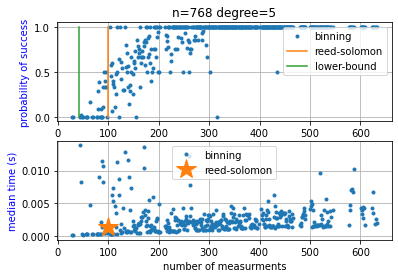

18 1.0 158
18 1.0 156
9 1.0 135
12 1.0 167
24 1.0 138


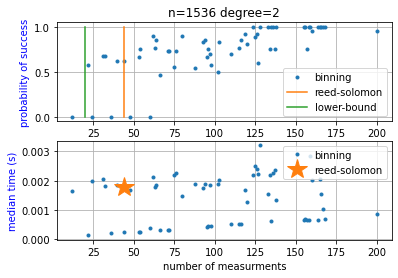

12 1.0 166
31 1.0 178
14 1.0 179
10 1.0 173
16 1.0 251
9 1.0 215
13 1.0 242
9 1.0 201
11 1.0 292
9 1.0 291
10 1.0 273
20 1.0 234
10 1.0 324
10 1.0 265
8 1.0 266
20 1.0 232


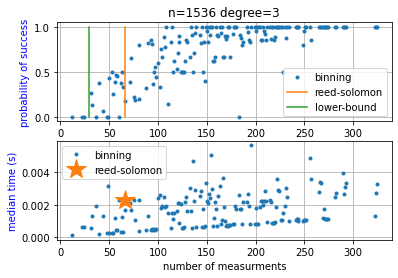

19 1.0 250
8 1.0 220
15 1.0 218
8 1.0 186
9 1.0 206
34 1.0 243
10 1.0 292
8 1.0 283
9 1.0 244
16 1.0 363
22 1.0 273
9 1.0 223
8 1.0 325
9 1.0 326
12 1.0 295
11 1.0 371
9 1.0 374
11 1.0 324
23 1.0 323
8 1.0 315
8 1.0 311
10 1.0 396


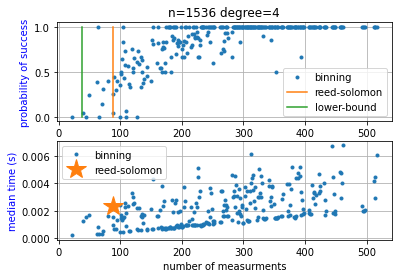

11 1.0 219
11 1.0 293
10 1.0 283
10 1.0 282
11 1.0 268
23 1.0 363
8 1.0 275
18 1.0 273
8 1.0 245
8 1.0 374
13 1.0 375
8 1.0 326
10 1.0 448
8 1.0 447
9 1.0 316
9 1.0 317
13 1.0 414
10 1.0 412
8 1.0 347
8 1.0 495
8 1.0 469
9 1.0 470
10 1.0 468
8 1.0 415
8 1.0 401
8 1.0 528


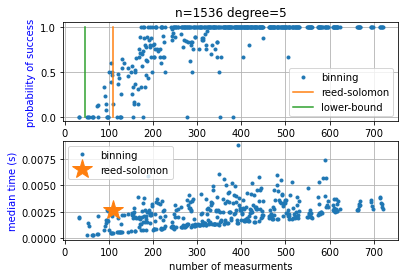

29 1.0 102
10 1.0 136
16 1.0 173
21 1.0 113
15 1.0 148
9 1.0 147
27 1.0 127
33 1.0 126
9 1.0 181
9 1.0 183
42 1.0 150


KeyError: 3072

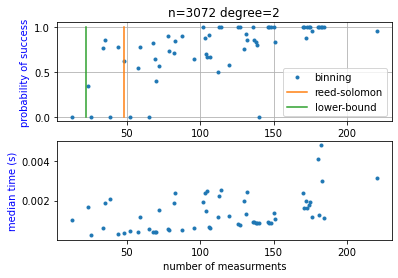

In [14]:
# Binning and reed-solomon plot the results
for n in result_binning:
    for degree in result_binning[n]:
        no_measurements , p_failure, time  = [], [], []
        for m in result_binning[n][degree]:
            l = len(result_binning[n][degree][m])
            p = sum([1 for j in range(l) if result_binning[n][degree][m][j]["status"]==True])/l
            if l>=8 and p==1:
                print(l,p,m)
            no_measurements.append(m)
            p_failure.append(p)
            time.append(np.median([result_binning[n][degree][m][j]["time"] for j in range(l)]))
            
        # print(p_failure, time)
        fig, (ax1, ax2) = plt.subplots(2, 1)
        ax1.set_ylabel("probability of success", color="blue")
        ax1.set_xlabel("number of measurments")
        my_len = len(no_measurements)
        ax1.plot(no_measurements, p_failure, ".", label="binning")
        ax1.plot([2*degree*math.ceil(np.log2(n))]*my_len, np.linspace(0,1,my_len), label="reed-solomon")
        ax1.plot( [lower_bound(n, degree)]*my_len, np.linspace(0,1,my_len), label = "lower-bound")
        ax1.xaxis.grid()
        ax1.yaxis.grid()
        ax1.set_title(f"n={n} degree={degree}")
        ax1.legend()
        
        ax2.set_ylabel("median time (s)", color="blue")
        ax2.set_xlabel("number of measurments")
        ax2.plot(no_measurements, time, ".", label="binning")
        ax2.plot(result_reedsolomon[n][degree]["measurements"], np.median(result_reedsolomon[n][degree]["times"]), "*", markersize=20, label="reed-solomon")
        ax2.xaxis.grid()
        ax2.yaxis.grid()
        ax2.legend()
        plt.savefig(f"images/binning/n={n}_d={degree}", dpi=300)
        
        plt.show()
           

In [10]:
print(result_binning[16][5][31])

[{'status': False, 'time': 0.00012564659118652344, 'n': 16, 'no_bins': 3, 'no_iterations': 3, 'ratio': 1.2, 'd': 5, 'measurements': 31}, {'status': True, 'time': 0.0009160041809082031, 'n': 16, 'no_bins': 3, 'no_iterations': 3, 'ratio': 1.3, 'd': 5, 'measurements': 31}, {'status': True, 'time': 0.0034036636352539062, 'n': 16, 'no_bins': 3, 'no_iterations': 3, 'ratio': 1.4, 'd': 5, 'measurements': 31}, {'status': False, 'time': 0.0010023117065429688, 'n': 16, 'no_bins': 3, 'no_iterations': 3, 'ratio': 1.4, 'd': 5, 'measurements': 31}, {'status': True, 'time': 9.965896606445312e-05, 'n': 16, 'no_bins': 8, 'no_iterations': 2, 'ratio': 1.2, 'd': 5, 'measurements': 31}, {'status': True, 'time': 0.0013210773468017578, 'n': 16, 'no_bins': 8, 'no_iterations': 2, 'ratio': 1.2, 'd': 5, 'measurements': 31}, {'status': True, 'time': 0.001180887222290039, 'n': 16, 'no_bins': 8, 'no_iterations': 2, 'ratio': 1.2, 'd': 5, 'measurements': 31}, {'status': True, 'time': 0.0033707618713378906, 'n': 16, 'n

In [4]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def lower_bound(n,d):
    return np.log2(sum([ncr(n,i) for i in range(0,d+1)]))

In [ ]:
print(data)